In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import fitGS
import fit1QSm
import fitpy8
import fitpy81SAp
import fitpy81SApp
# import fit1Tap
from PHMGS import *
from PHM1QSm import *
from H2_diat import *
from h2sing import *
# print(fit1QSm.fit3d.__doc__)
print(fitpy81SApp.fit3d.__doc__)
print(diathh_sing.__doc__)
# print(diatphm.__doc__)

e = fit3d(r12,r13,r23,der)

Wrapper for ``fit3d``.

Parameters
----------
r12 : input float
r13 : input float
r23 : input float
der : input rank-1 array('d') with bounds (3)

Returns
-------
e : float

ener,der = diathh_sing(r)

Wrapper for ``diathh_sing``.

Parameters
----------
r : input float

Returns
-------
ener : float
der : float



/tmp/ipykernel_3843820/2755810795.py:79: UserWarning: The following kwargs were not used by contour: 'ls'
  plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)


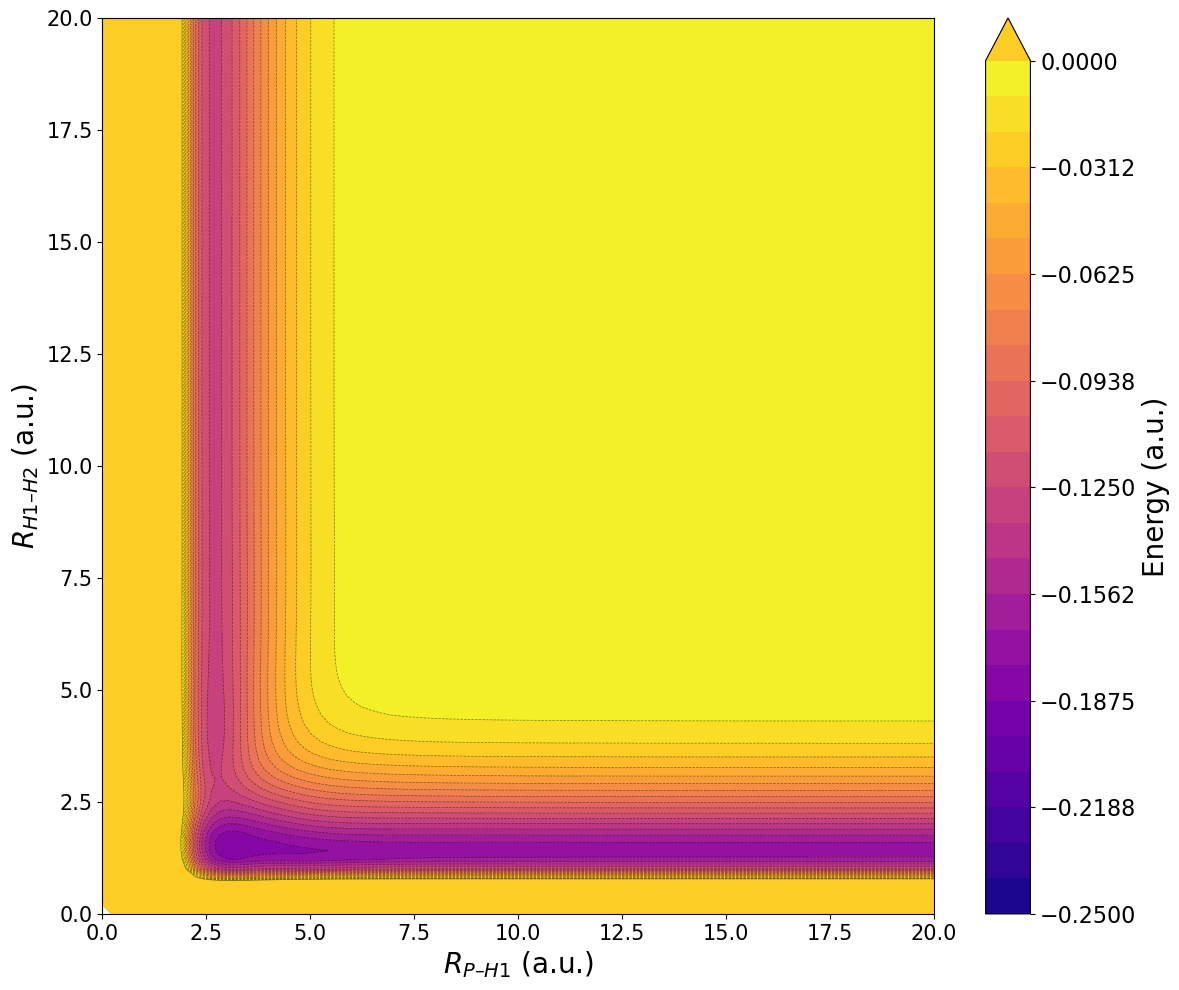

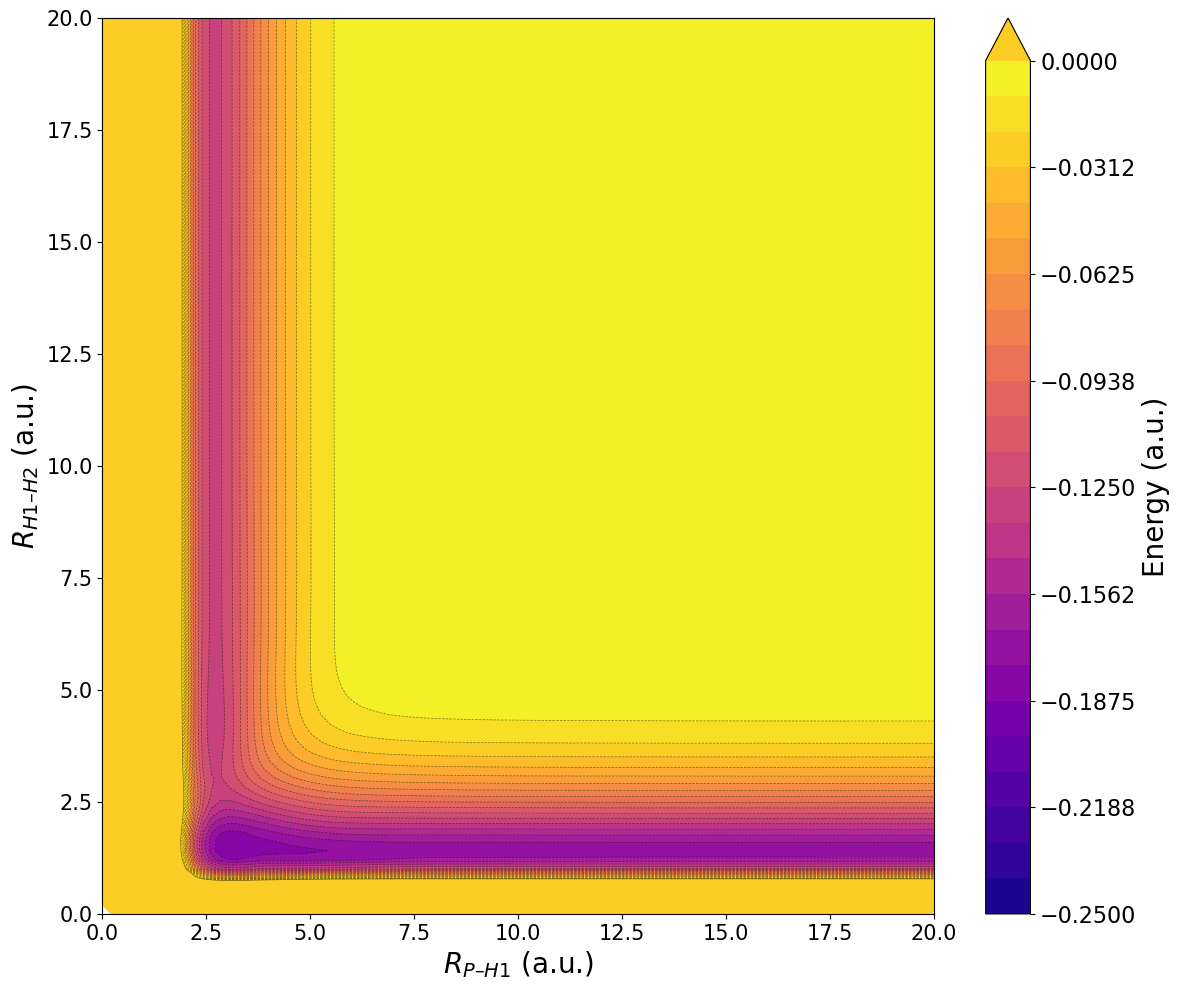

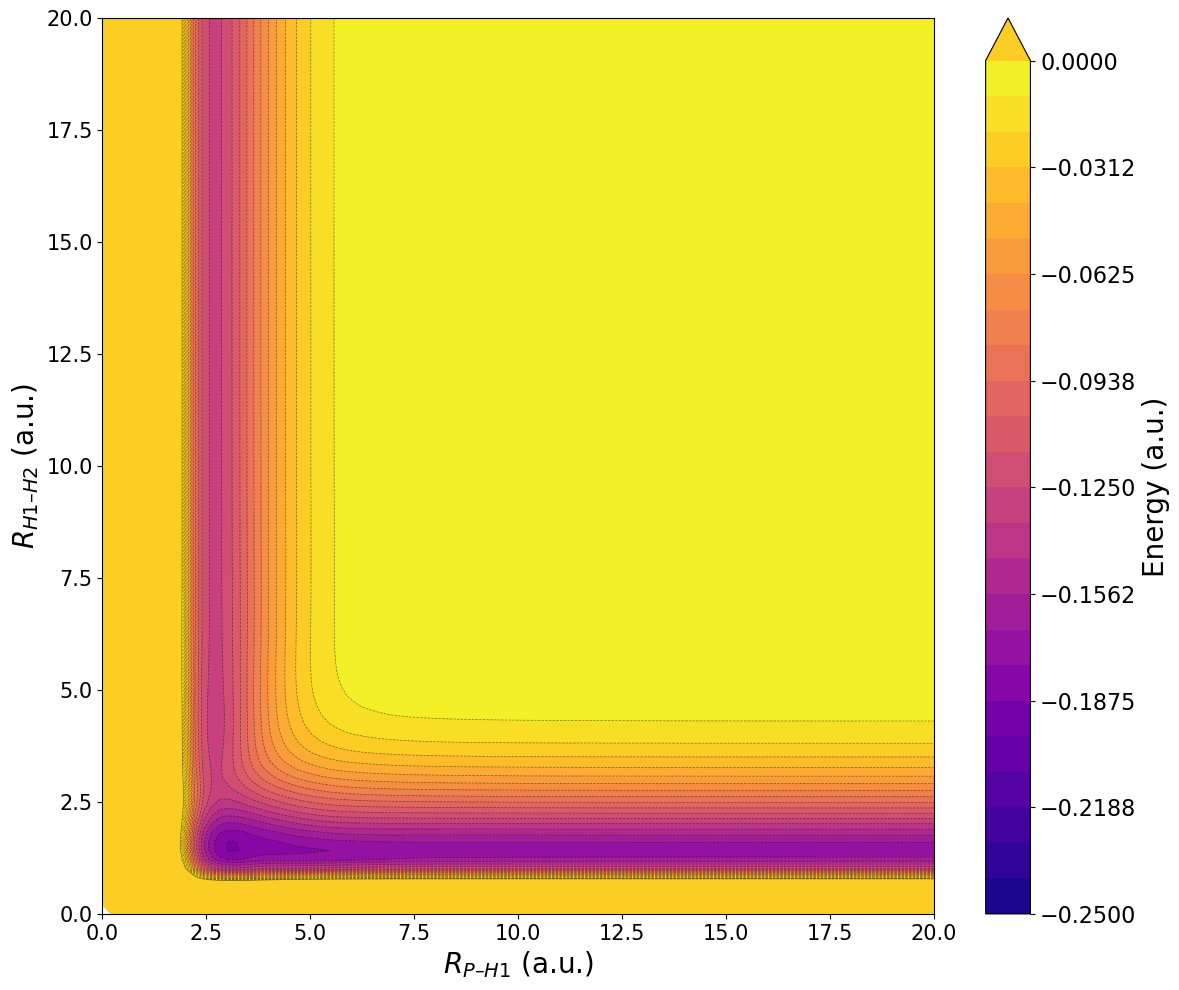

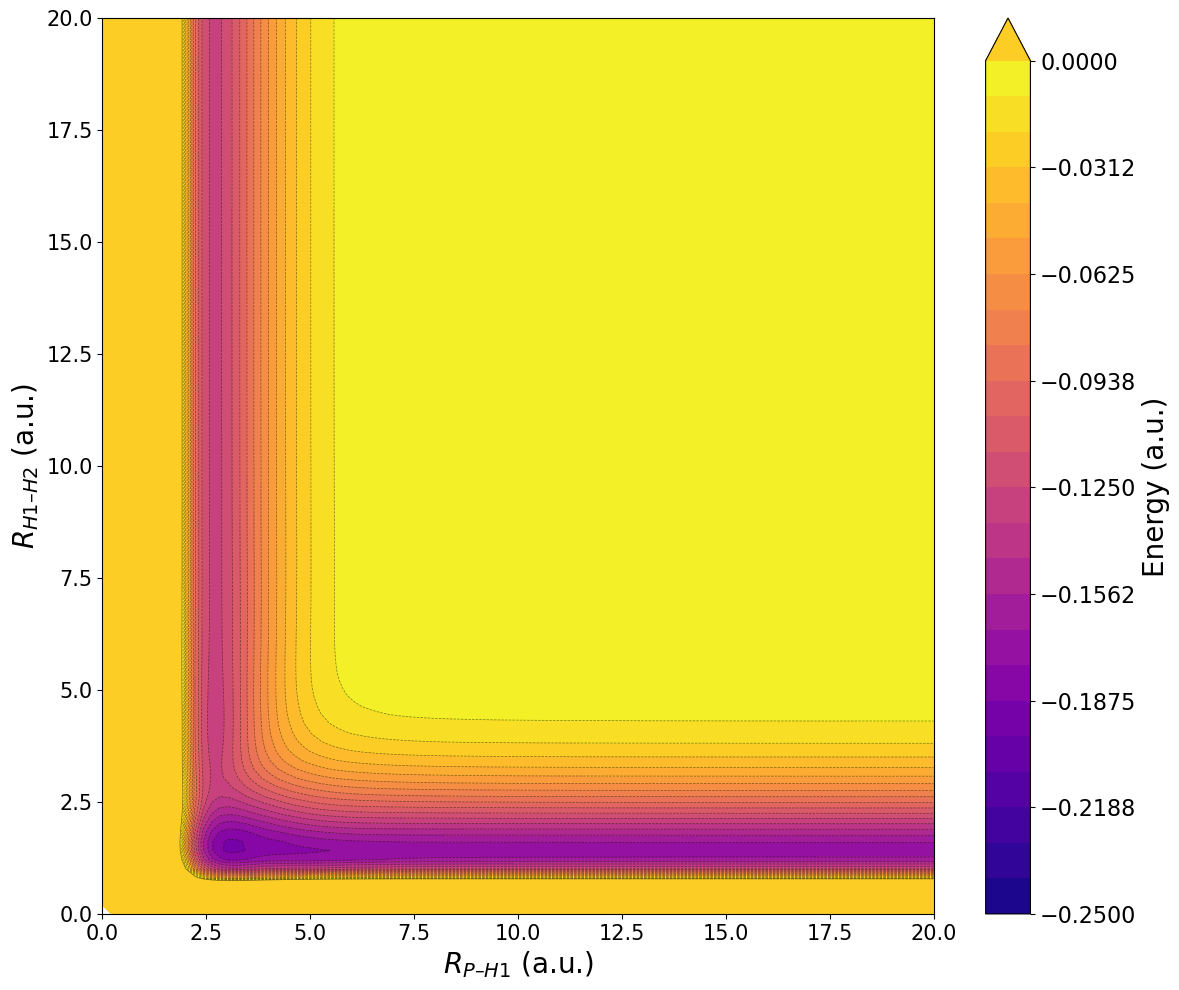

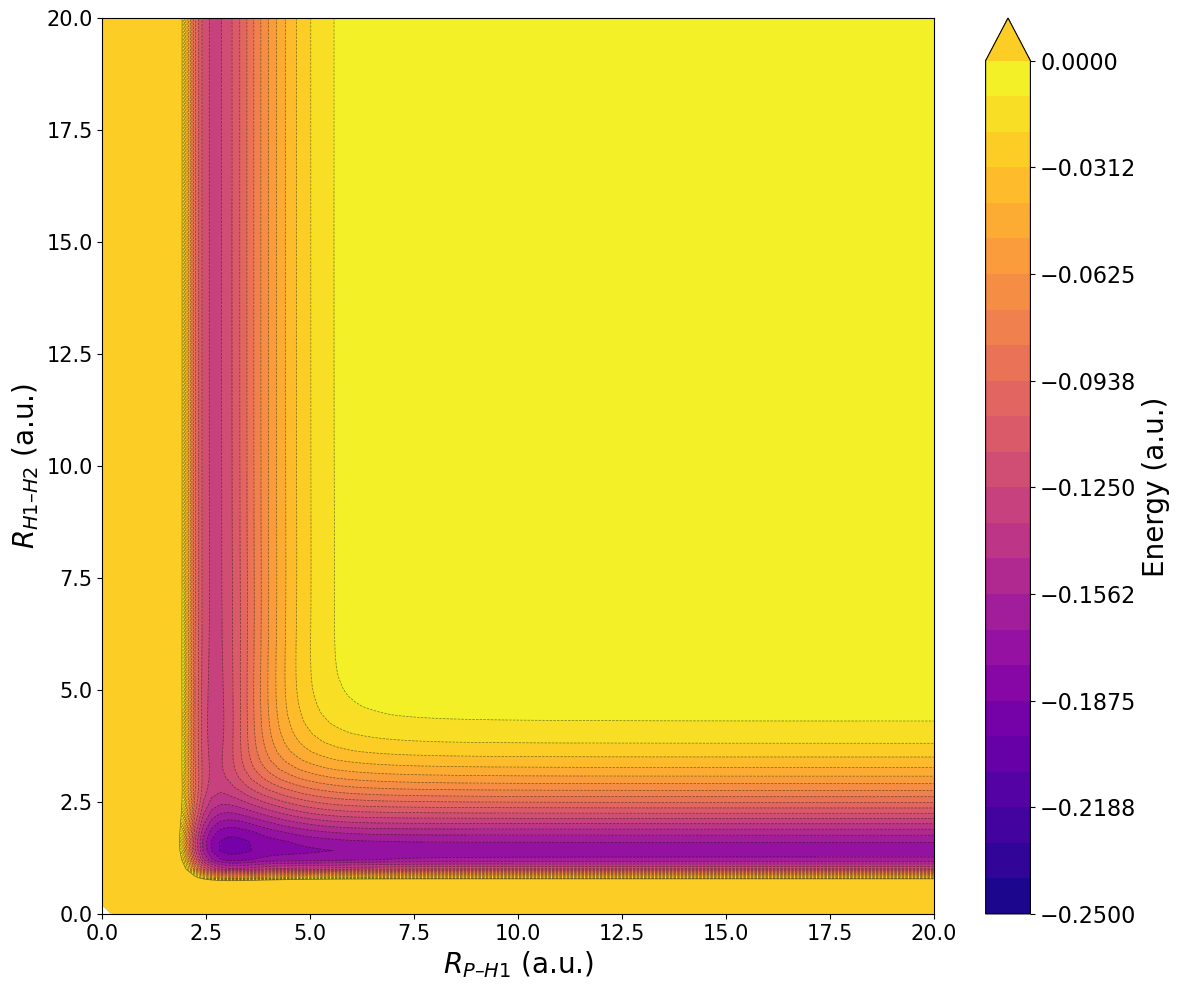

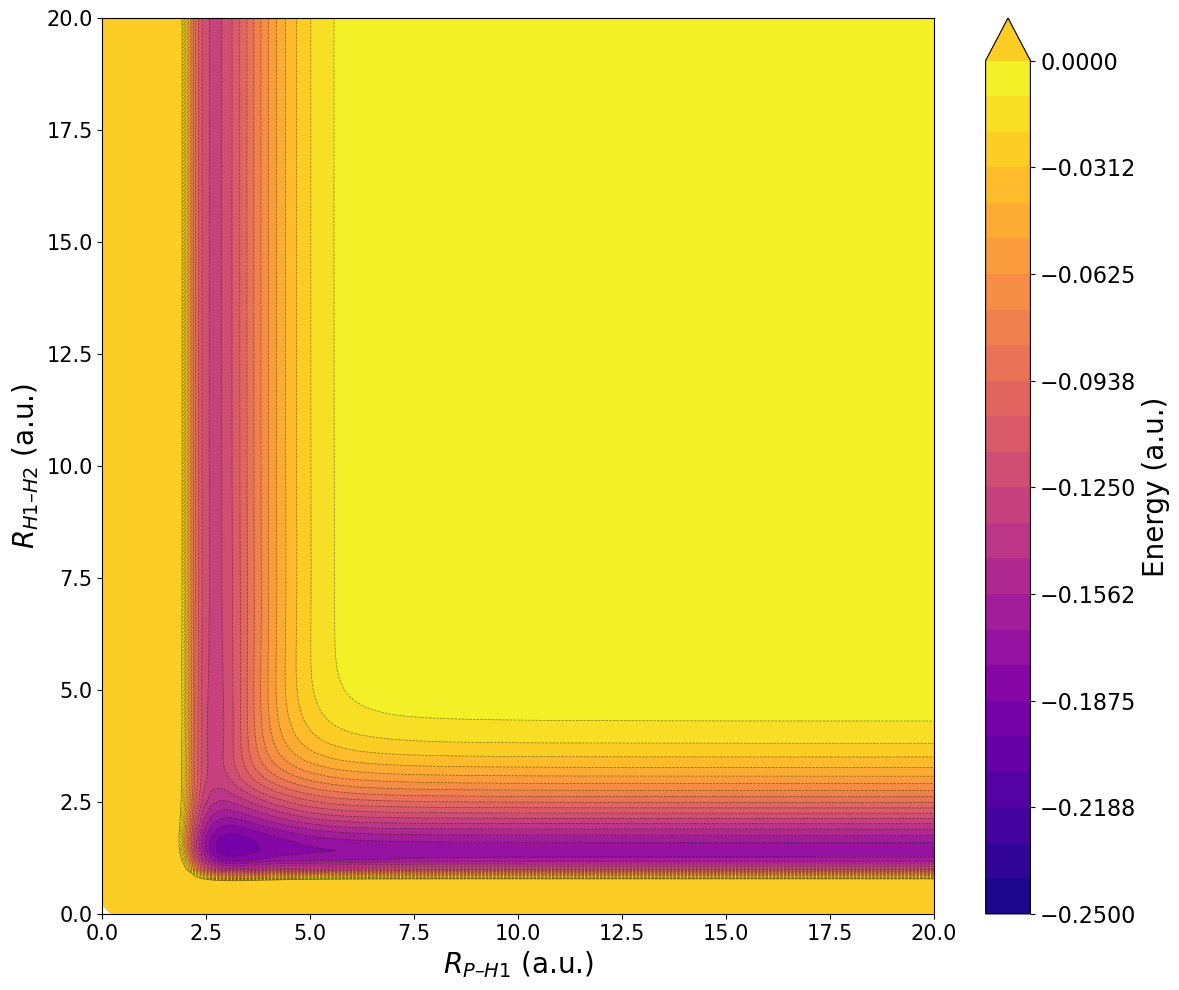

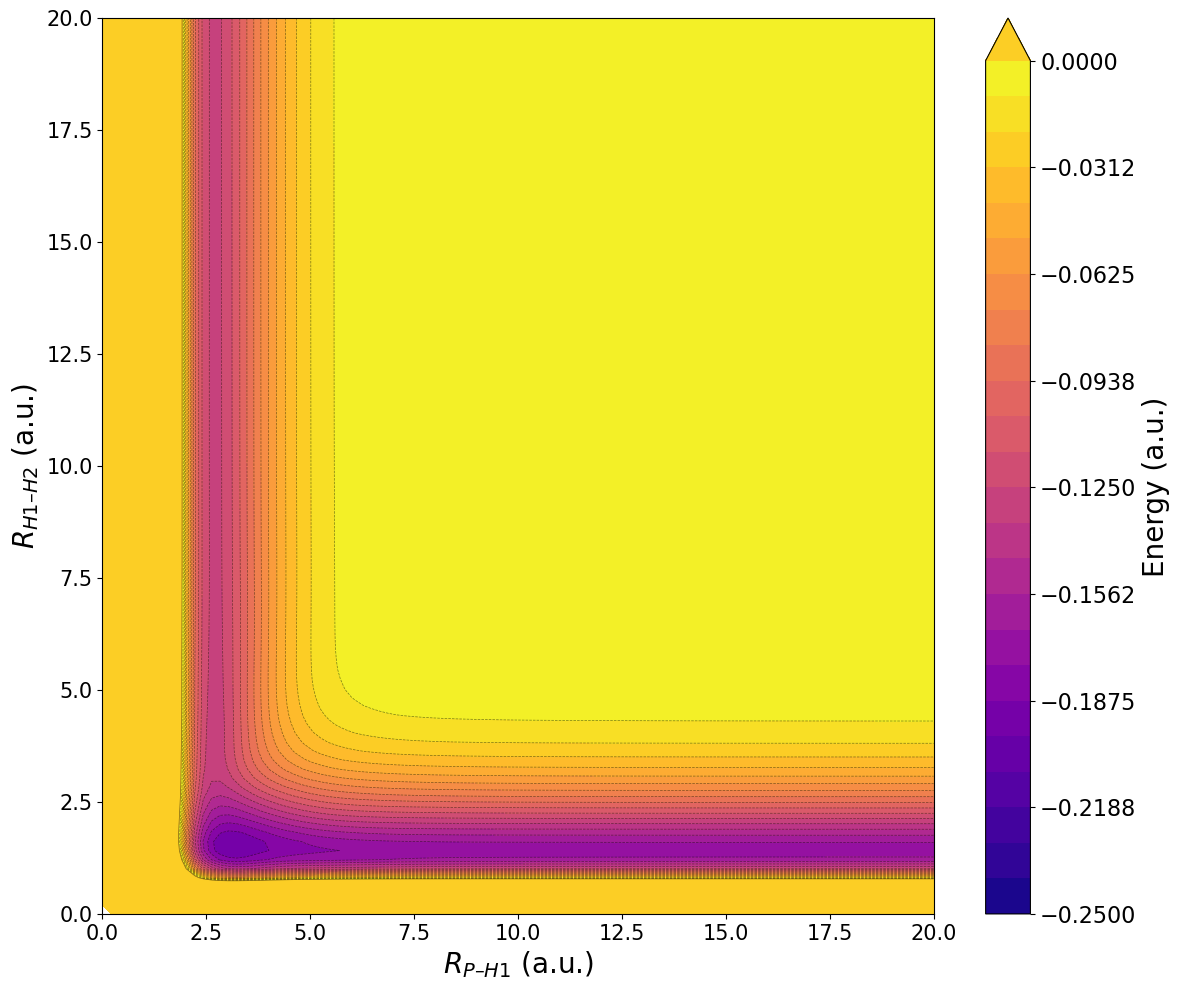

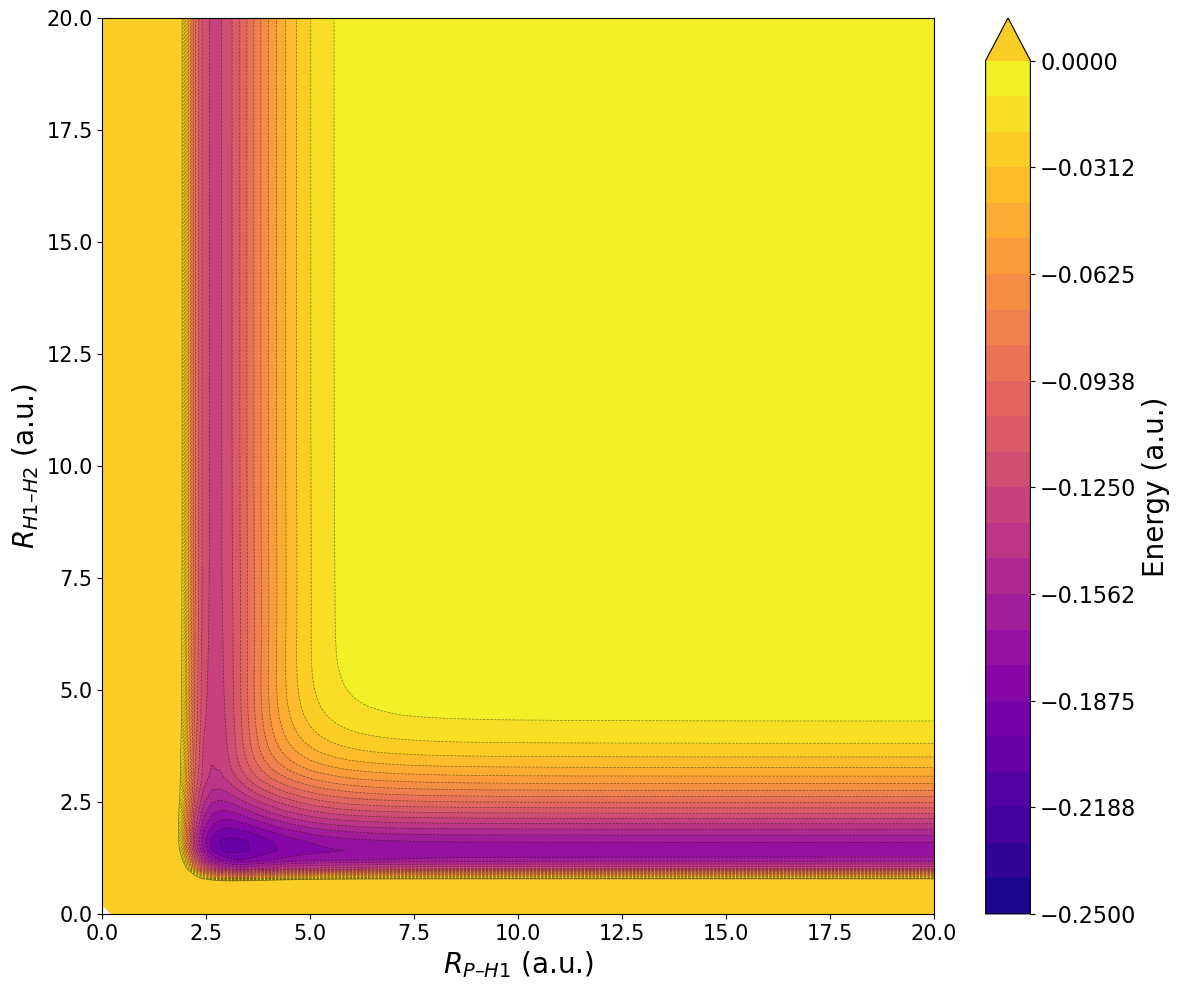

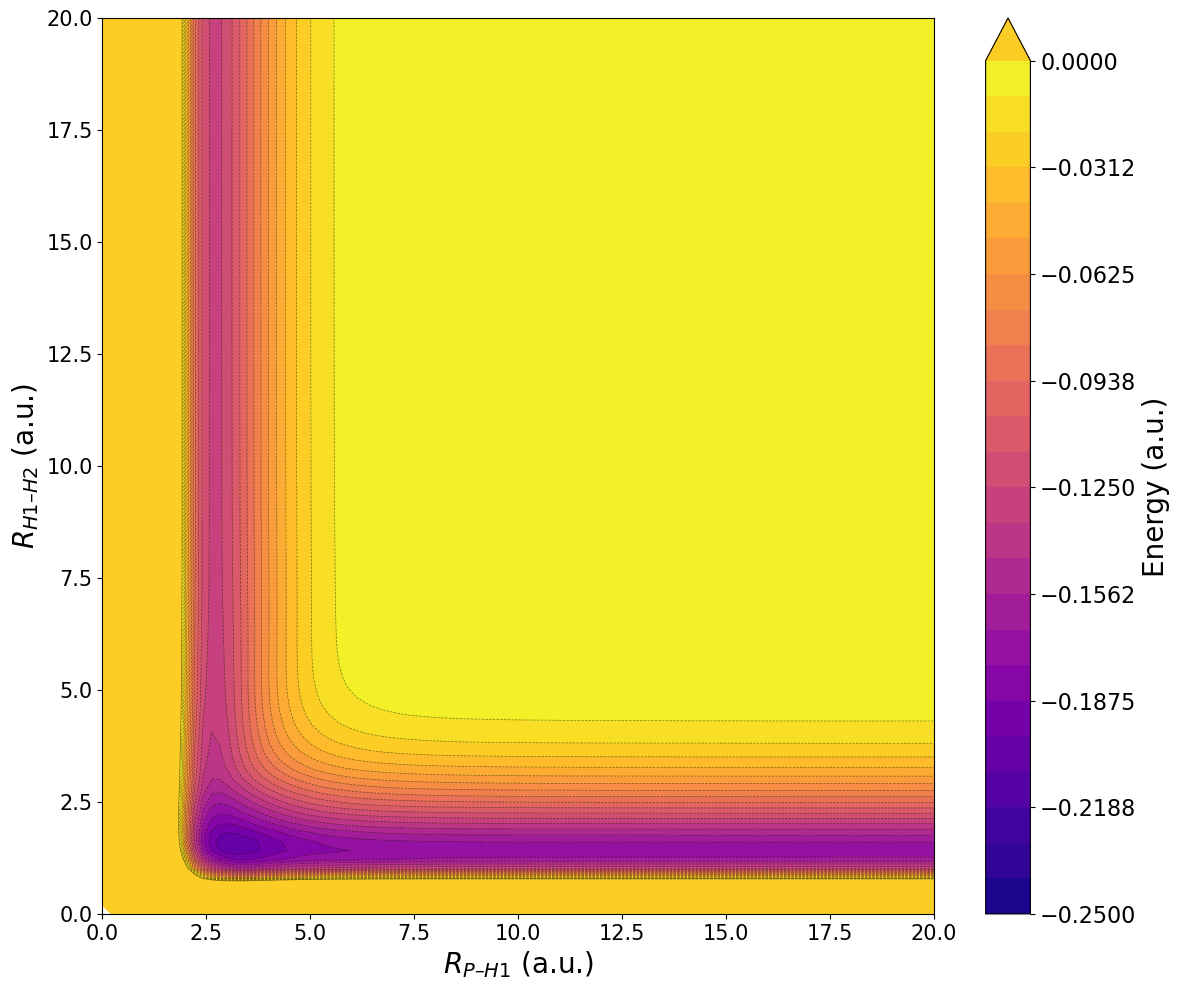

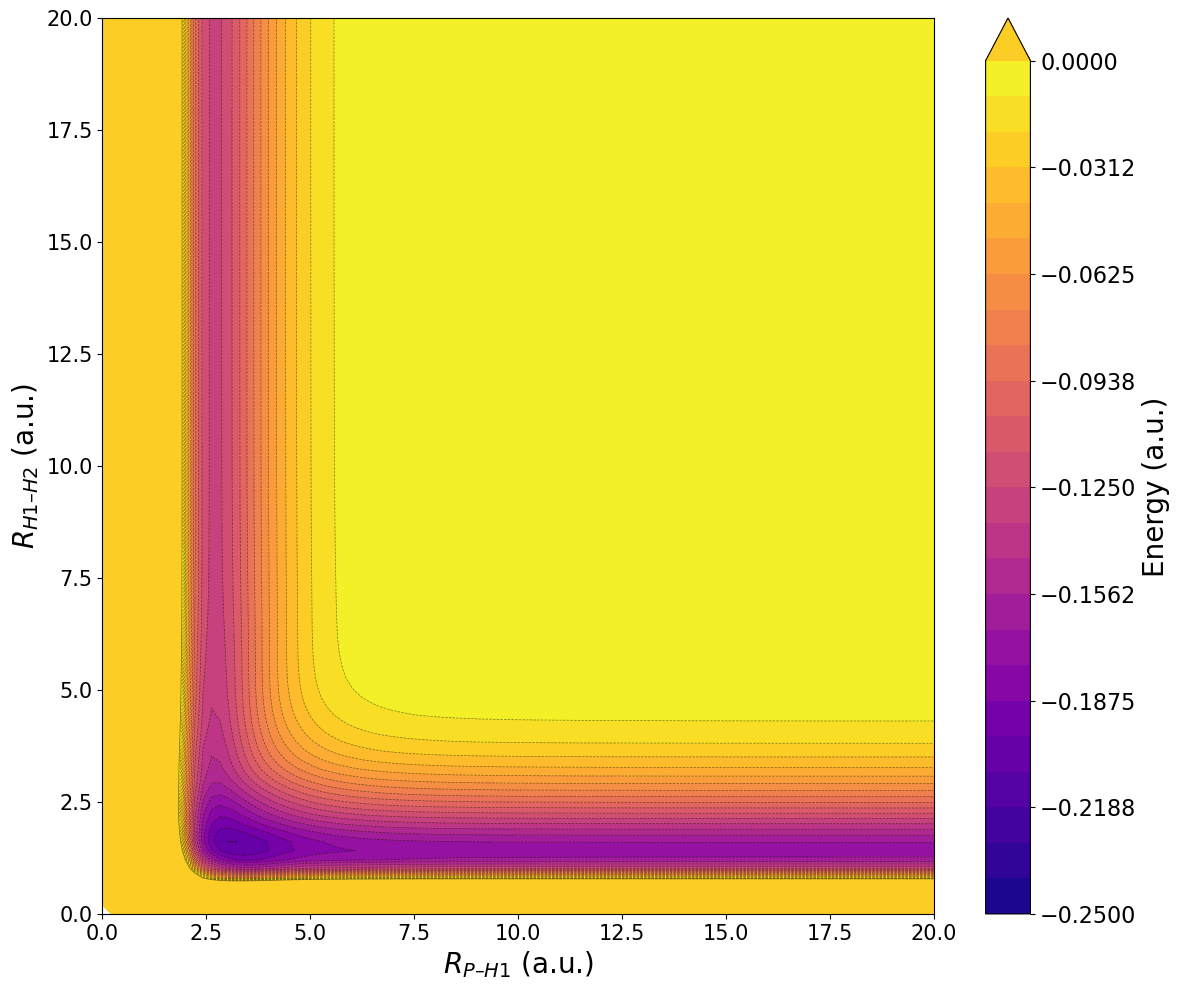

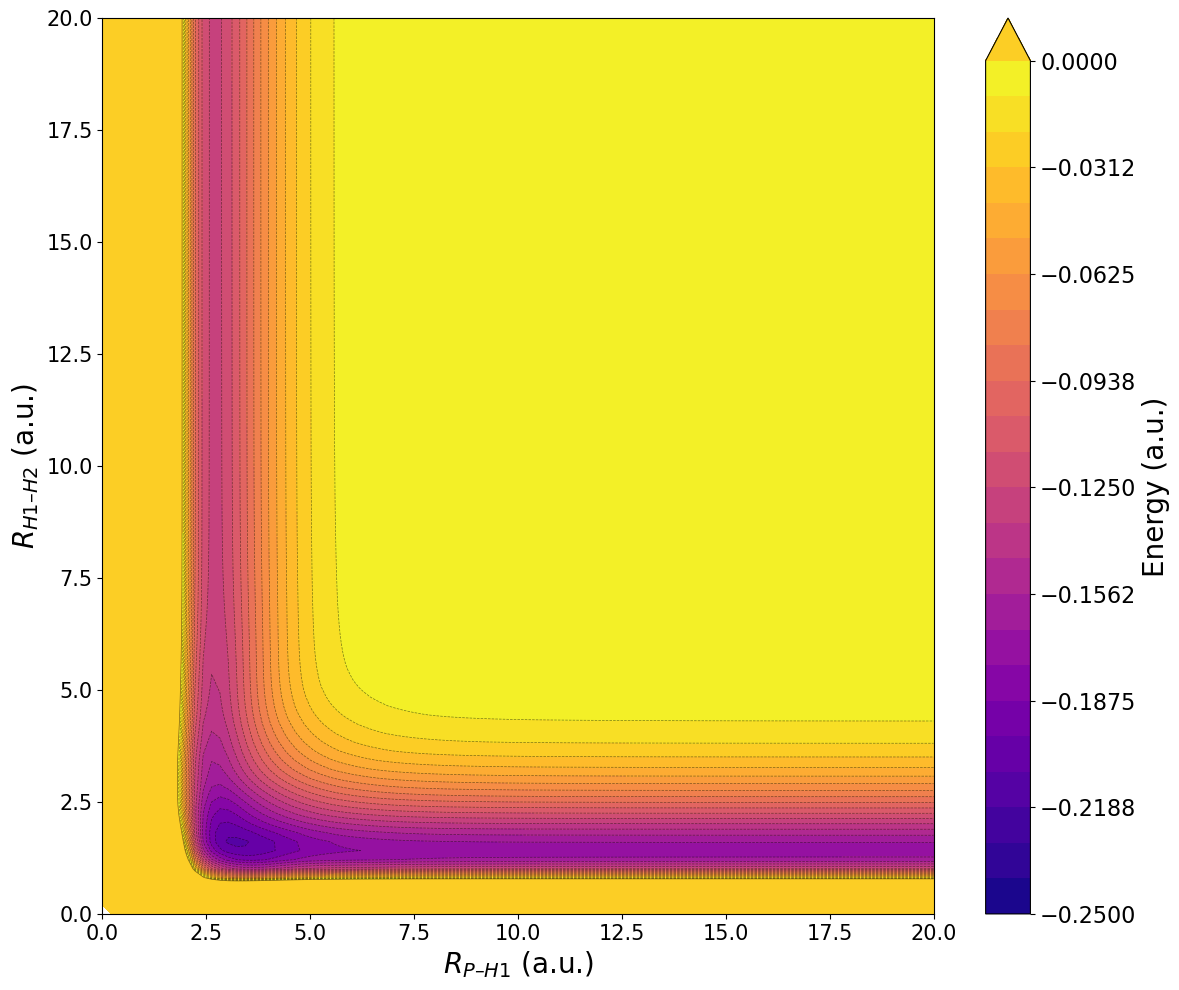

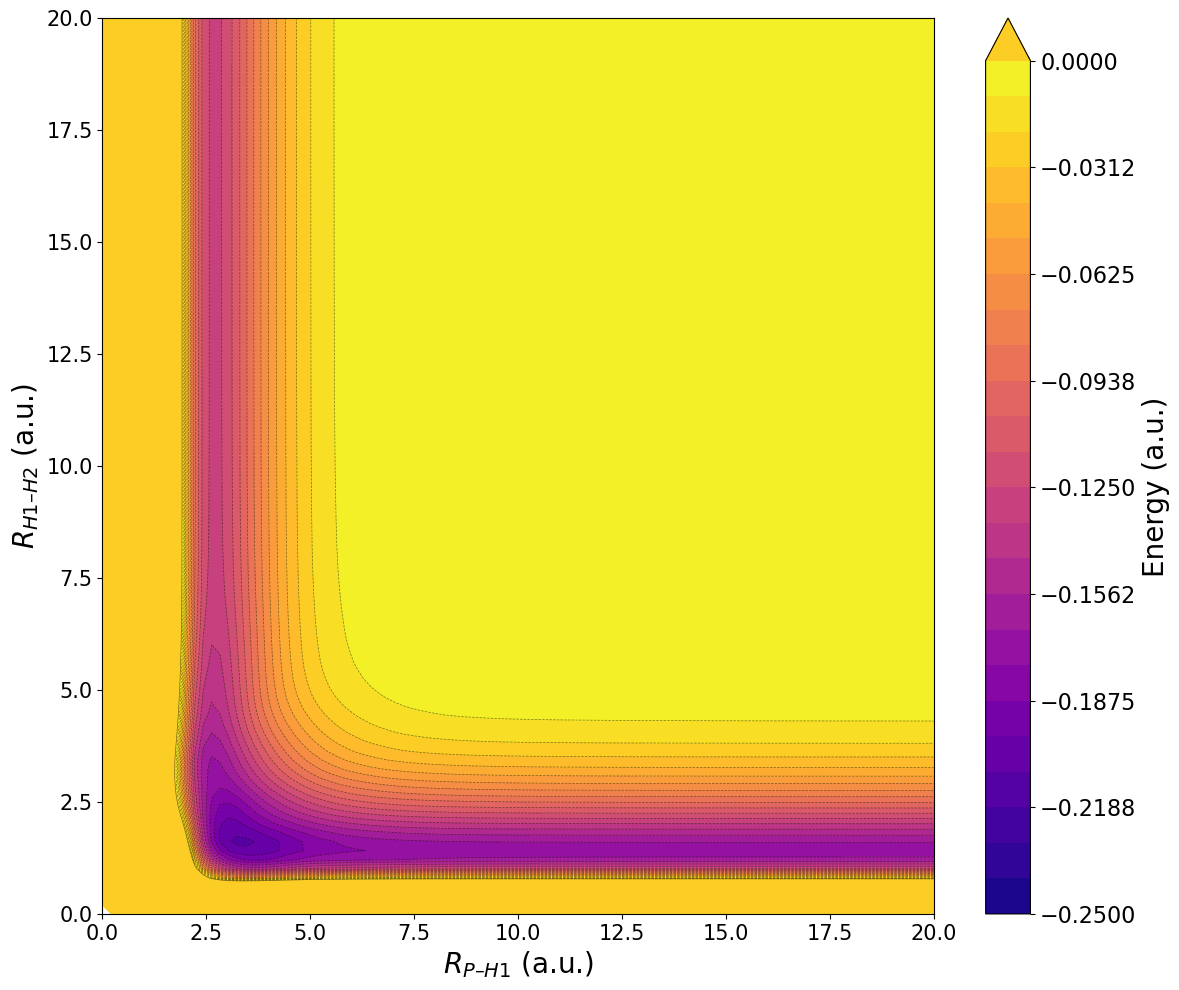

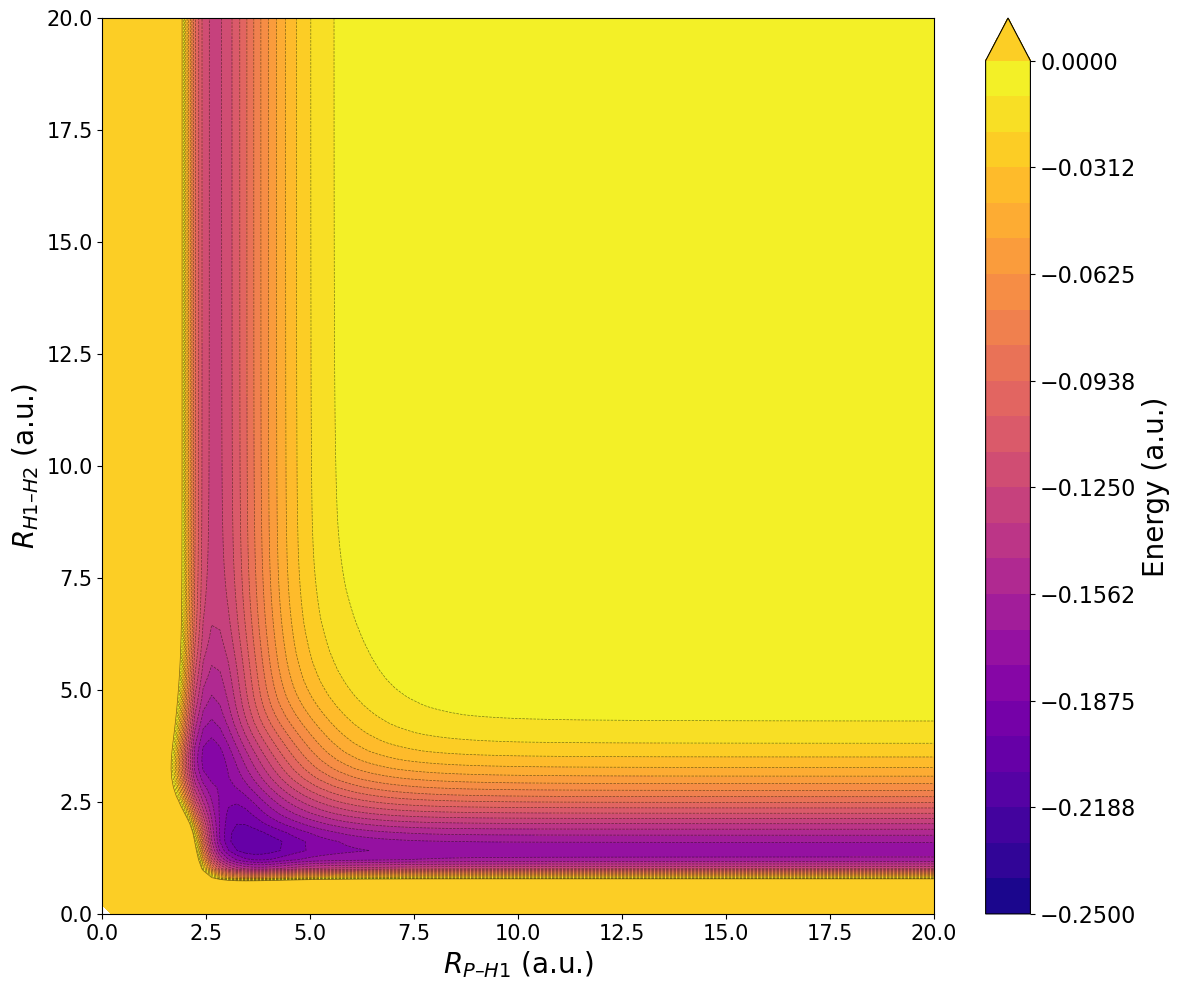

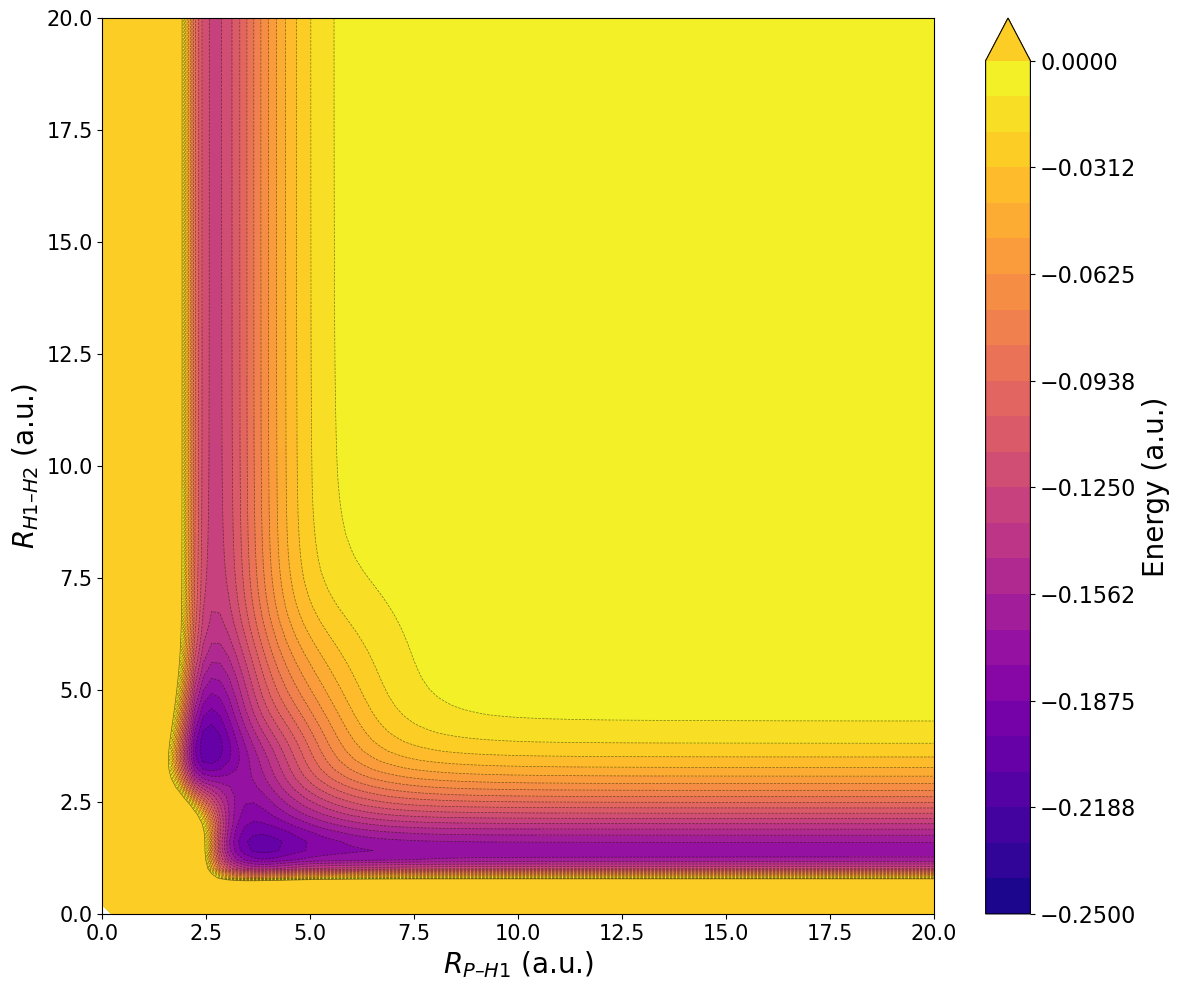

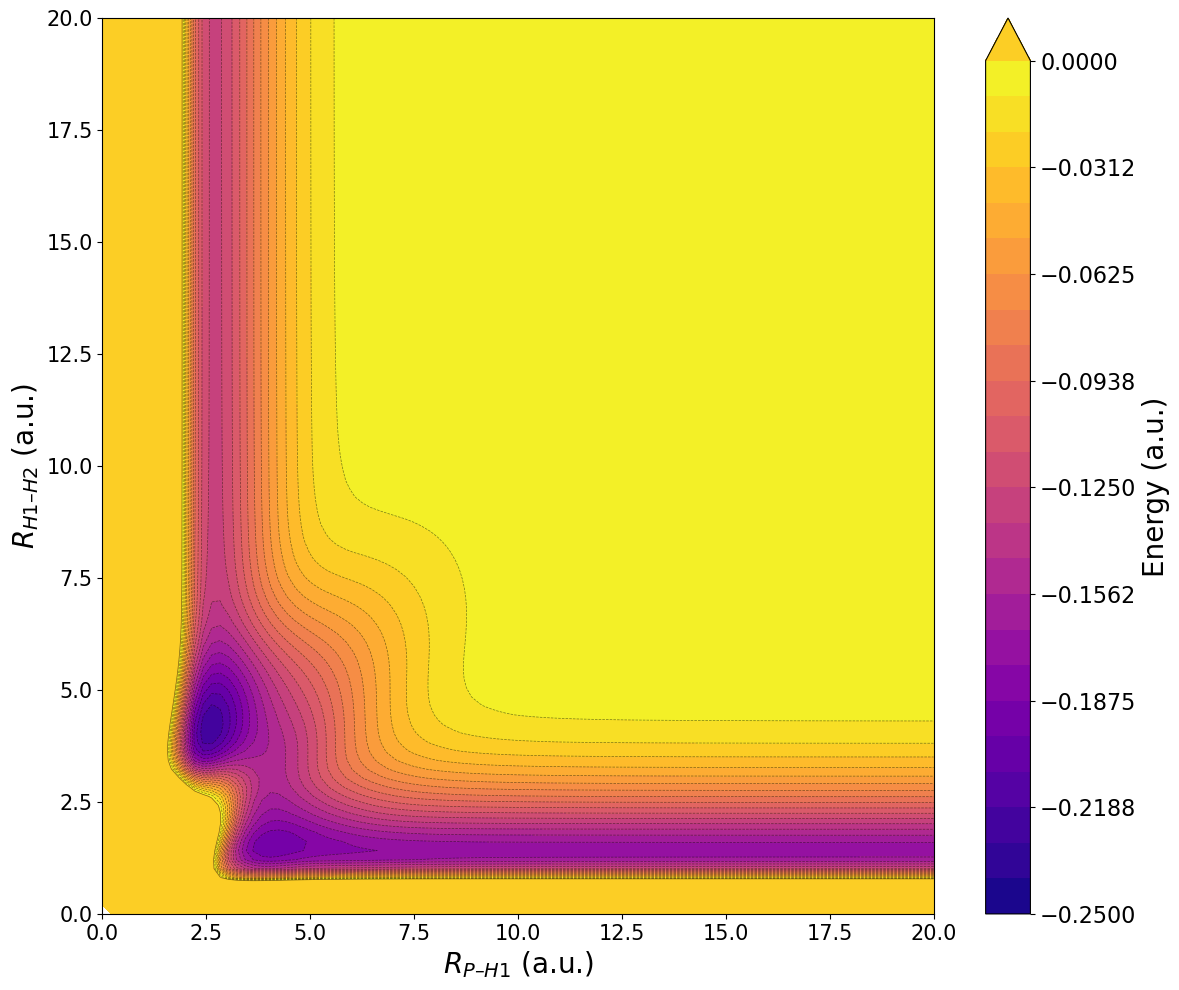

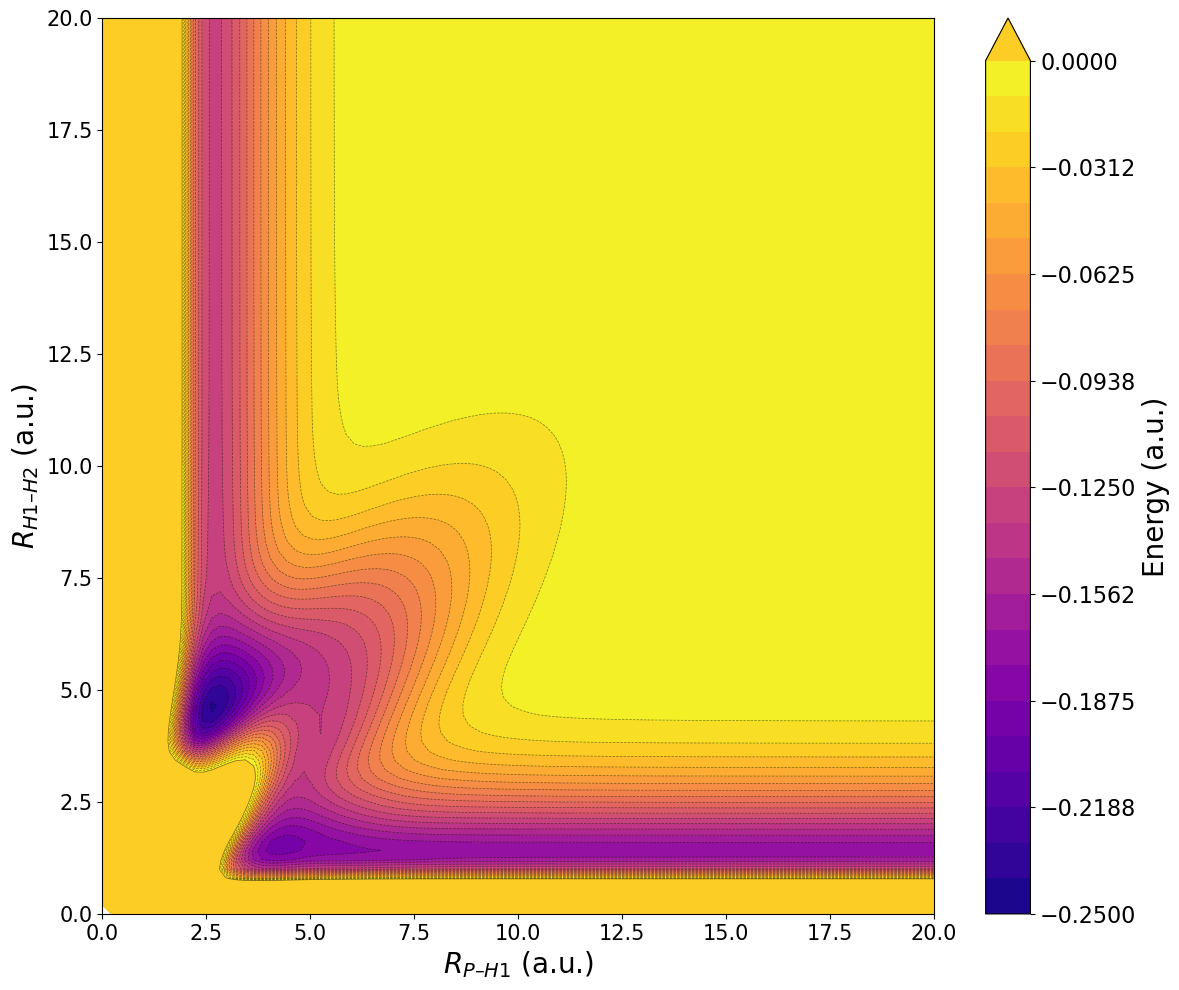

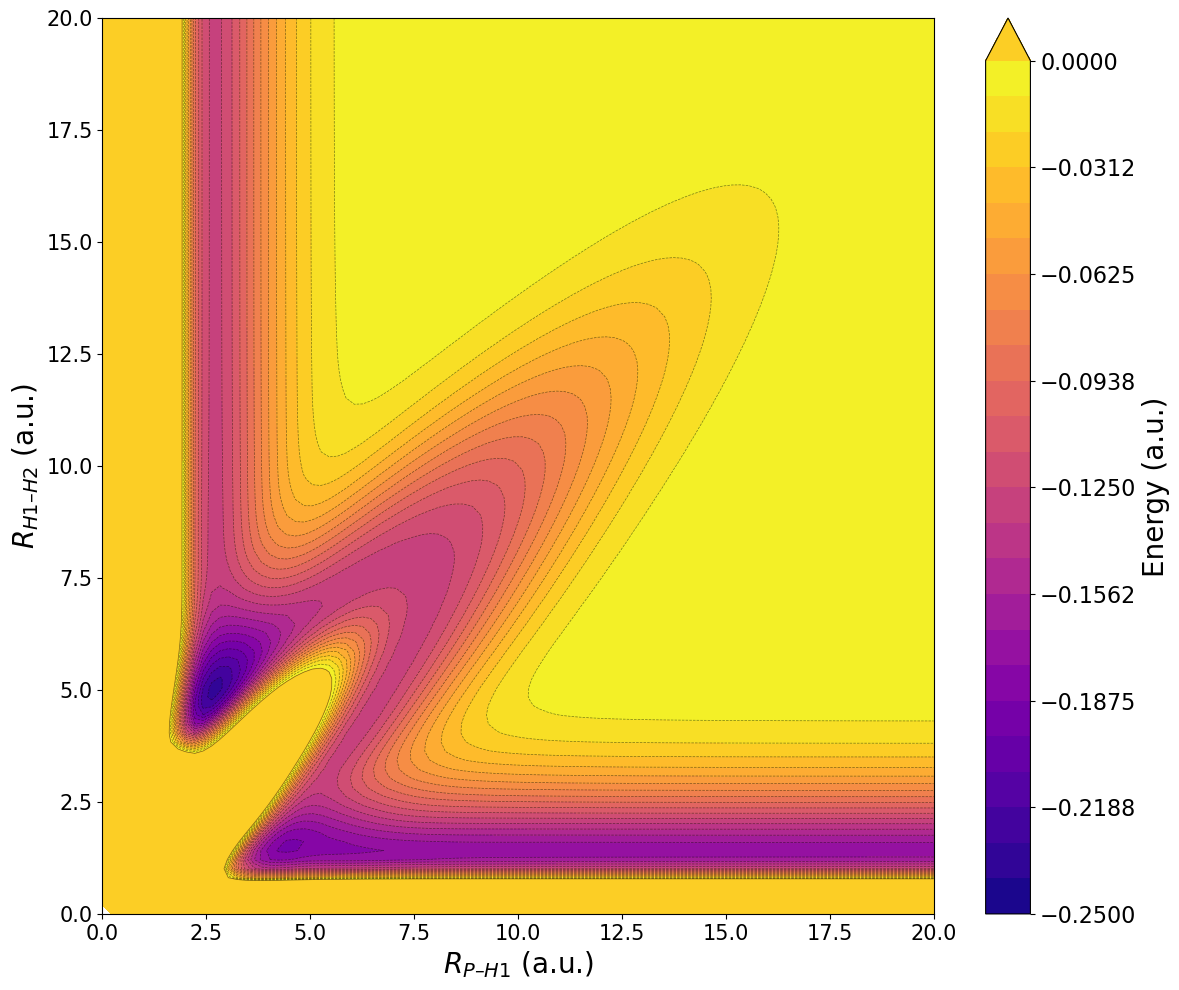

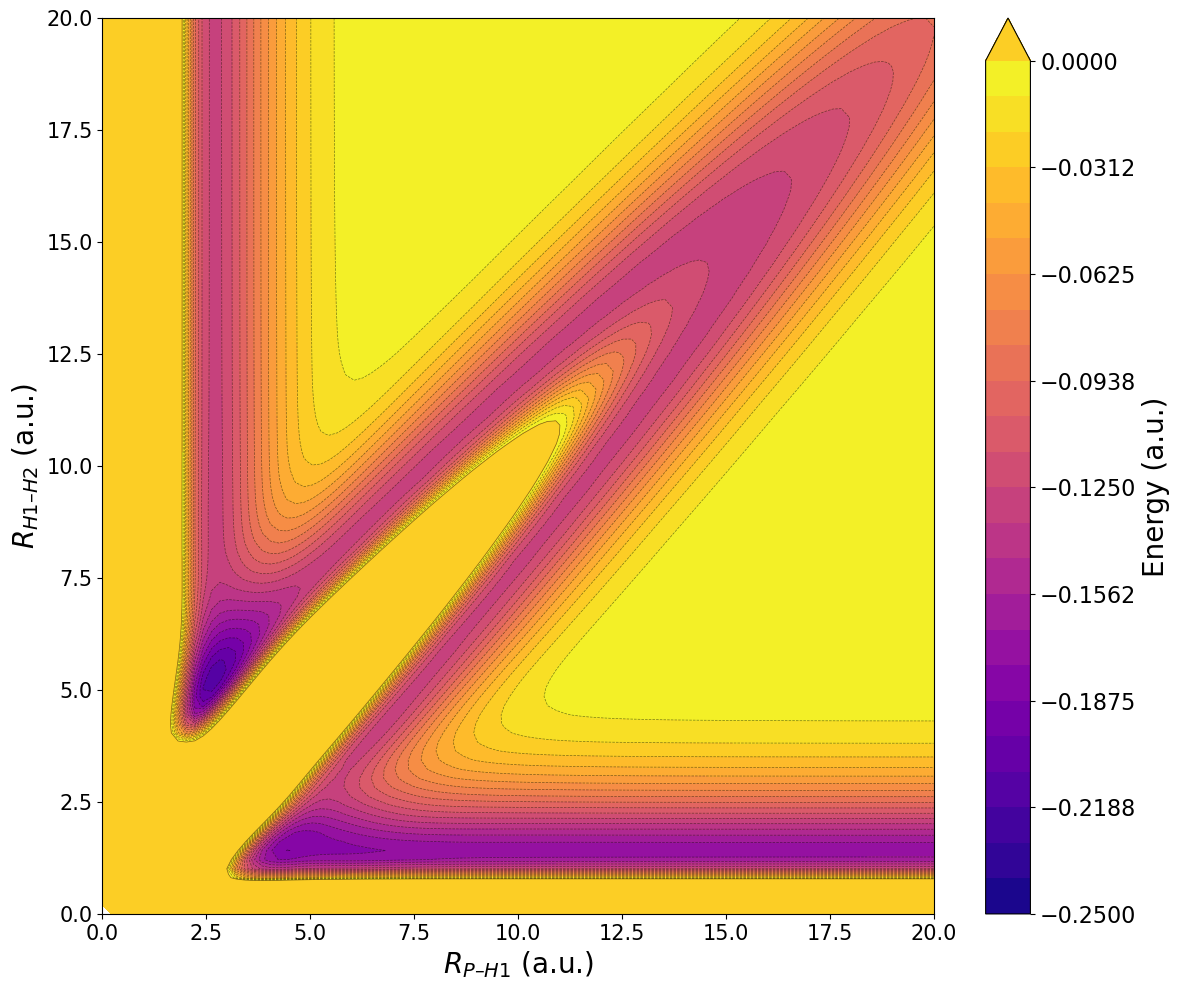

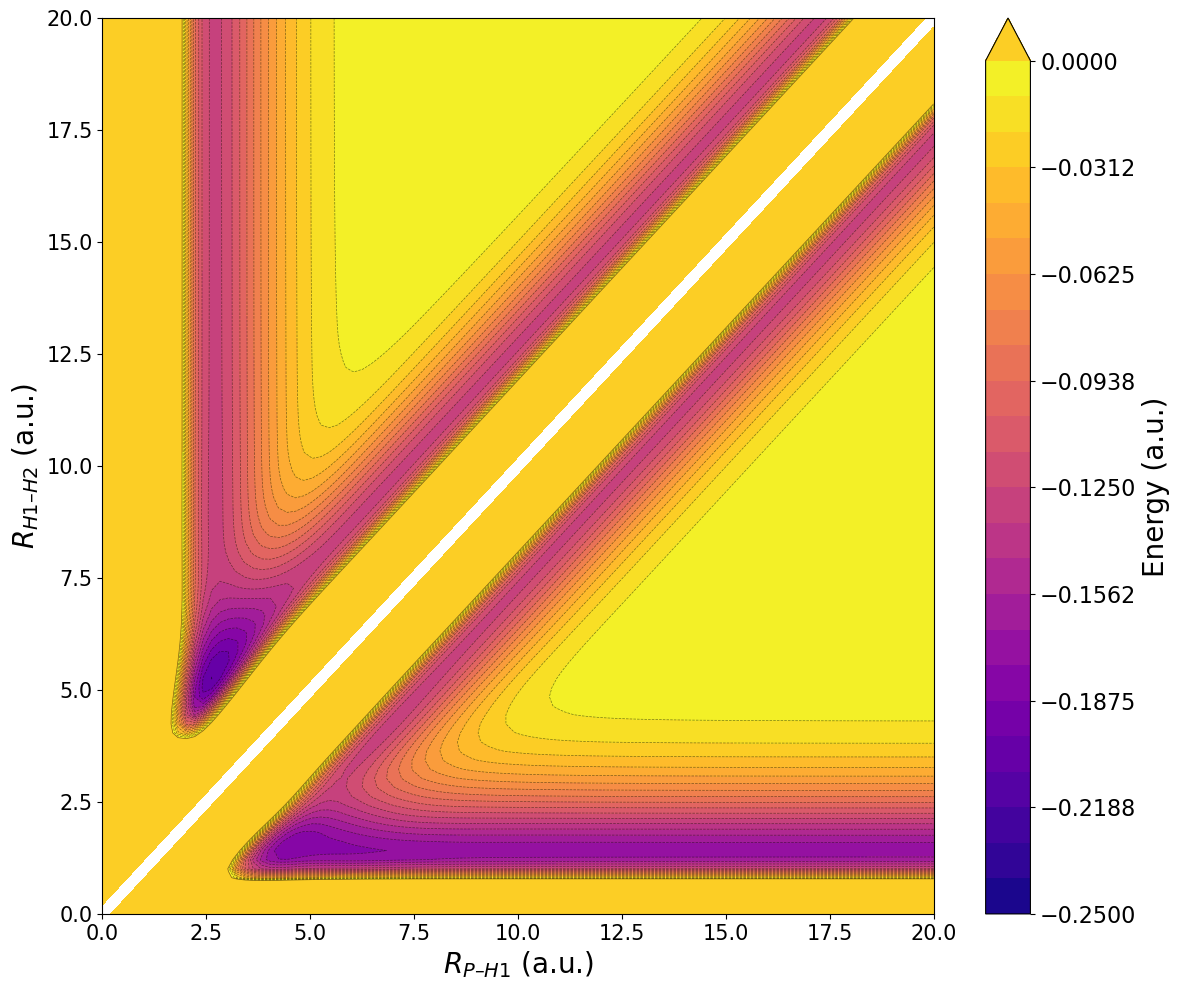

In [2]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh(r_HH)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)
    # print(r_PH2,e13)
    bod3,bodd3=fitGS.fit3d(r_PH1,r_PH2,r_HH)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def es_geometria_valida(r12, r13, r23):
    return (
        r12 + r13 > r23 and
        r12 + r23 > r13 and
        r13 + r23 > r12
    )

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

def energia_con_angulo(r12, r23, theta_rad):
    r13_sq = r12**2 + r23**2 + 2 * r12 * r23 * np.cos(theta_rad)
    if r13_sq <= 0:
        return np.nan  # geometría inválida
    r13 = np.sqrt(r13_sq)
    return energia(r12, r13, r23)

angle = [0.00, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
angle = np.linspace(0,180,6)
angle = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0]

for ang in angle:
    # Malla
    r12_vals = np.linspace(0.0, 20.0, 100)
    r23_vals = np.linspace(0.0, 20.0, 100)
    R12, R23 = np.meshgrid(r12_vals, r23_vals)
    E = np.zeros_like(R12)
    theta_rad = np.radians(ang)

    # Calcular energía
    for i in range(R12.shape[0]):
        for j in range(R12.shape[1]):
            E[i, j] = energia_con_angulo(R12[i,j],R23[i,j],theta_rad)
            # if es_geometria_valida(R12[i,j],theta_rad,R23[i,j]):
                # E[i, j] = energia(R12[i, j], theta_rad, R23[i, j])

    # Colormap completo entre vmin y vmax
    vmin = -0.25
    vmax = 0.0
    levels = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más
    levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

    # Colormap y norm
    cmap = plt.get_cmap('gnuplot').copy()
    cmap = plt.get_cmap('plasma').copy()
    cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

    # Graficar
    plt.figure(figsize=(12, 10))
    cp = plt.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
    plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
    cbar=plt.colorbar(cp, label='Energy (u.a.)')
    plt.xlabel(r'$R_{P–H1}$ (a.u.)',fontsize=20)
    plt.ylabel(r'$R_{H1–H2}$ (a.u.)',fontsize=20)
    plt.tick_params(axis='both',labelsize=15)
    cbar.set_label('Energy (a.u.)', fontsize=20)  # texto del label
    cbar.ax.tick_params(labelsize=16)
    # plt.title(r"1 $^3$A'' (P–H2 fix at "+ str(ang) + " a.u.)")
    plt.tight_layout()
    plt.savefig("1TApp_"+str(ang)+".png", dpi=300,transparent=True)
    plt.show()
 

In [ ]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia(r_PH1, r_PH2, r_HH):
    if r_PH1 < 2.0:
        e12 = 0.309099*r_PH1**2.0-1.57688*r_PH1+1.95195
    else:
        e12,d12 = diat1qsm(r_PH1)
    
    if r_PH2 < 2.0:
        e13 = 0.309099*r_PH2**2.0-1.57688*r_PH2+1.95195
    else:
        e13,d13 = diat1qsm(r_PH2)

    if r_HH < 0.74:
        e23 = 1.33889*r_HH**2.0-2.92997*r_HH+1.47035
    else:
        e23,d23 = diathh(r_HH)

    bod3,bodd3=fit1QSm.fit3d(r_PH1,r_PH2,r_HH)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def es_geometria_valida(r12, r13, r23):
    return (
        r12 + r13 > r23 and
        r12 + r23 > r13 and
        r13 + r23 > r12
    )

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

def energia_con_angulo(r12, r23, theta_rad):
    r13_sq = r12**2 + r23**2 + 2 * r12 * r23 * np.cos(theta_rad)
    if r13_sq <= 0:
        return np.nan  # geometría inválida
    r13 = np.sqrt(r13_sq)
    return energia(r12, r13, r23)

angle = [0.00, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
angle = np.linspace(0,180,6)
angle = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0]
# angle = [0.0]

for ang in angle:
    # Malla
    r12_vals = np.linspace(0.0, 20.0, 100)
    r23_vals = np.linspace(0.0, 20.0, 100)
    R12, R23 = np.meshgrid(r12_vals, r23_vals)
    E = np.zeros_like(R12)
    theta_rad = np.radians(ang)


    # Calcular energía
    for i in range(R12.shape[0]):
        for j in range(R12.shape[1]):
            E[i, j] = energia_con_angulo(R12[i,j],R23[i,j],theta_rad)
            # if es_geometria_valida(R12[i,j],theta_rad,R23[i,j]):
                # E[i, j] = energia(R12[i, j], theta_rad, R23[i, j])

    # Colormap completo entre vmin y vmax
    vmin = -0.25
    vmax = 0.0
    levels = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más
    levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

    # Colormap y norm
    cmap = plt.get_cmap('gnuplot').copy()
    cmap = plt.get_cmap('plasma').copy()
    cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

    # Graficar
    plt.figure(figsize=(12, 10))
    cp = plt.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
    plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
    cbar=plt.colorbar(cp, label='Energy (u.a.)')
    plt.xlabel(r'$R_{P–H1}$ (a.u.)',fontsize=20)
    plt.ylabel(r'$R_{H1–H2}$ (a.u.)',fontsize=20)
    plt.tick_params(axis='both',labelsize=15)
    cbar.set_label('Energy (a.u.)', fontsize=20)  # texto del label
    cbar.ax.tick_params(labelsize=16)
    # plt.title(r"1 $^3$A'' (P–H2 fix at "+ str(ang) + " a.u.)")
    plt.tight_layout()
    plt.savefig("2TApp_"+str(ang)+".png", dpi=300,transparent=True)
    plt.show()
 

In [3]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
# def energia(r_PH1, r_PH2, r_HH):
#     if (r_PH1 < 2.0):
#         e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
#     else:
#         e12,d12=diatphm(r_PH1)
#     if (r_PH2 < 2.0):
#         e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
#     else:
#         e13,d13=diatphm(r_PH2)
#     if (r_HH < 0.74):
#         e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
#     else:
#         e23,d23=diathh(r_HH)

#     e12,d12=diatphm(r_PH1)
#     e13,d13=diatphm(r_PH2)
#     e23,d23=diathh(r_HH)
#     # print(r_PH2,e13)
#     bodd3=[0,0,0]
#     bod3=fitpy8.fit3d(r_PH1,r_PH2,r_HH,bodd3)
#     # print(r_PH1,r_PH2,r_HH)
#     return bod3 + e12 + e13 + e23

def es_geometria_valida(r12, r13, r23):
    return (
        r12 + r13 > r23 and
        r12 + r23 > r13 and
        r13 + r23 > r12
    )

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

def energia_con_angulo(r12, r23, theta_rad):
    r13_sq = r12**2 + r23**2 + 2 * r12 * r23 * np.cos(theta_rad)
    if r13_sq <= 0:
        return np.nan  # geometría inválida
    r13 = np.sqrt(r13_sq)
    return energia1SApp(r12, r13, r23)

angle = [0.00, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
angle = np.linspace(0,180,6)
angle = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0]

for ang in angle:
    # Malla
    r12_vals = np.linspace(0.0, 20.0, 100)
    r23_vals = np.linspace(0.0, 20.0, 100)
    R12, R23 = np.meshgrid(r12_vals, r23_vals)
    E = np.zeros_like(R12)
    theta_rad = np.radians(ang)

    # Calcular energía
    for i in range(R12.shape[0]):
        for j in range(R12.shape[1]):
            E[i, j] = energia_con_angulo(R12[i,j],R23[i,j],theta_rad)
            # if es_geometria_valida(R12[i,j],theta_rad,R23[i,j]):
                # E[i, j] = energia(R12[i, j], theta_rad, R23[i, j])

    # Colormap completo entre vmin y vmax
    vmin = -0.25
    vmax = 0.0
    levels = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más
    levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

    # Colormap y norm
    cmap = plt.get_cmap('gnuplot').copy()
    cmap = plt.get_cmap('plasma').copy()
    cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

    # Graficar
    plt.figure(figsize=(12, 10))
    cp = plt.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
    plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
    cbar=plt.colorbar(cp, label='Energy (u.a.)')
    plt.xlabel(r'$R_{P–H1}$ (a.u.)',fontsize=20)
    plt.ylabel(r'$R_{H1–H2}$ (a.u.)',fontsize=20)
    plt.tick_params(axis='both',labelsize=15)
    cbar.set_label('Energy (a.u.)', fontsize=20)  # texto del label
    cbar.ax.tick_params(labelsize=16)
    # plt.title(r"1 $^3$A'' (P–H2 fix at "+ str(ang) + " a.u.)")
    plt.tight_layout()
    # plt.savefig("1TAp_"+str(ang)+".png", dpi=300,transparent=True)
    plt.show()
 

NameError: name 'energia1SApp' is not defined

In [6]:
def energia1TApp(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh(r_HH)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)
    # print(r_PH2,e13)
    bod3,bodd3=fitGS.fit3d(r_PH1,r_PH2,r_HH)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def energia2TApp(r_PH1, r_PH2, r_HH):
    if r_PH1 < 2.0:
        e12 = 0.309099*r_PH1**2.0-1.57688*r_PH1+1.95195
    else:
        e12,d12 = diat1qsm(r_PH1)
    
    if r_PH2 < 2.0:
        e13 = 0.309099*r_PH2**2.0-1.57688*r_PH2+1.95195
    else:
        e13,d13 = diat1qsm(r_PH2)

    if r_HH < 0.74:
        e23 = 1.33889*r_HH**2.0-2.92997*r_HH+1.47035
    else:
        e23,d23 = diathh(r_HH)

    bod3,bodd3=fit1QSm.fit3d(r_PH1,r_PH2,r_HH)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia1TAp(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh(r_HH)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)
    # print(r_PH2,e13)
    bodd3=[0,0,0]
    bod3=fitpy8.fit3d(r_PH1,r_PH2,r_HH,bodd3)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def energia1SAp(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh_sing(r_HH)

    # print(r_PH2,e13)
    bodd3=[0,0,0]
    bod3=fitpy81SAp.fit3d(r_PH1,r_PH2,r_HH,bodd3)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def energia1SApp(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh_sing(r_HH)

    # print(r_PH2,e13)
    bodd3=[0,0,0]
    bod3=fitpy81SApp.fit3d(r_PH1,r_PH2,r_HH,bodd3)
    # print(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

In [ ]:
r12_vals = np.linspace(1.0, 20.0, 100)
r23_vals = np.linspace(0.5, 20.0, 100)
R12, R23 = np.meshgrid(r12_vals, r23_vals)

# Parámetros
n_states = 3
theta_medio_deg = [150, 150, 130]  # Ángulo intermedio específico para cada estado
theta_list_deg = [
    [0,         theta_medio_deg[0], 180],
    [0,         theta_medio_deg[1], 180],
    [0,         theta_medio_deg[2], 180],
]
theta_list_rad = np.radians(theta_list_deg).T  # 3 filas (ángulos), n_states columnas

# Configuración de gráficos
fig, axes = plt.subplots(3, n_states, figsize=(12, 10), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.05, wspace=0.05)

vmin, vmax = -0.25, 0.0
levels = np.linspace(vmin, vmax, 50)
levels_cnt = np.linspace(vmin, vmax, 25)
cmap = plt.get_cmap('plasma').copy()
cmap.set_over(cmap(0.9))
norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

# Loop principal
for i_theta in range(3):          
    for j_state in range(n_states):
        ax = axes[i_theta, j_state]
        theta_rad = theta_list_rad[i_theta, j_state]

        E = np.zeros_like(R12)
        for i in range(R12.shape[0]):
            for j in range(R12.shape[1]):
                r12 = R12[i, j]
                r23 = R23[i, j]
                argumento = r12**2 + r23**2 + 2 * r12 * r23 * np.cos(theta_rad)
                if argumento <= 0:
                    E[i, j] = np.nan
                else:
                    r13 = np.sqrt(argumento)
                    if j_state == 0:
                        E[i, j] = energia1TAp(r12, r13, r23)
                    elif j_state == 1:
                        E[i, j] = energia1TApp(r12, r13, r23)
                    elif j_state == 2:
                        E[i, j] = energia2TApp(r12, r13, r23)

        # Graficar
        if i_theta == 1 and j_state == 2:
            cp = ax.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
        else:
            ax.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
        ax.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, linestyles=':', alpha=0.5)

        # Ejes limpios
        if i_theta == 2:
            ax.set_xlabel(r"$R_{P–H1}$ (a.u.)", fontsize=12)
            ax.tick_params(axis='x', labelsize=12)
        if j_state == 0:
            ax.set_ylabel(r"$R_{H1–H2}$ (a.u.)", fontsize=12)
            ax.tick_params(axis='y', labelsize=12)

# Colorbar externa
cbar = fig.colorbar(cp, ax=axes, orientation='vertical', fraction=0.025, pad=0.02)
cbar.set_label('Energy (a.u.)', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3843820/3052659316.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


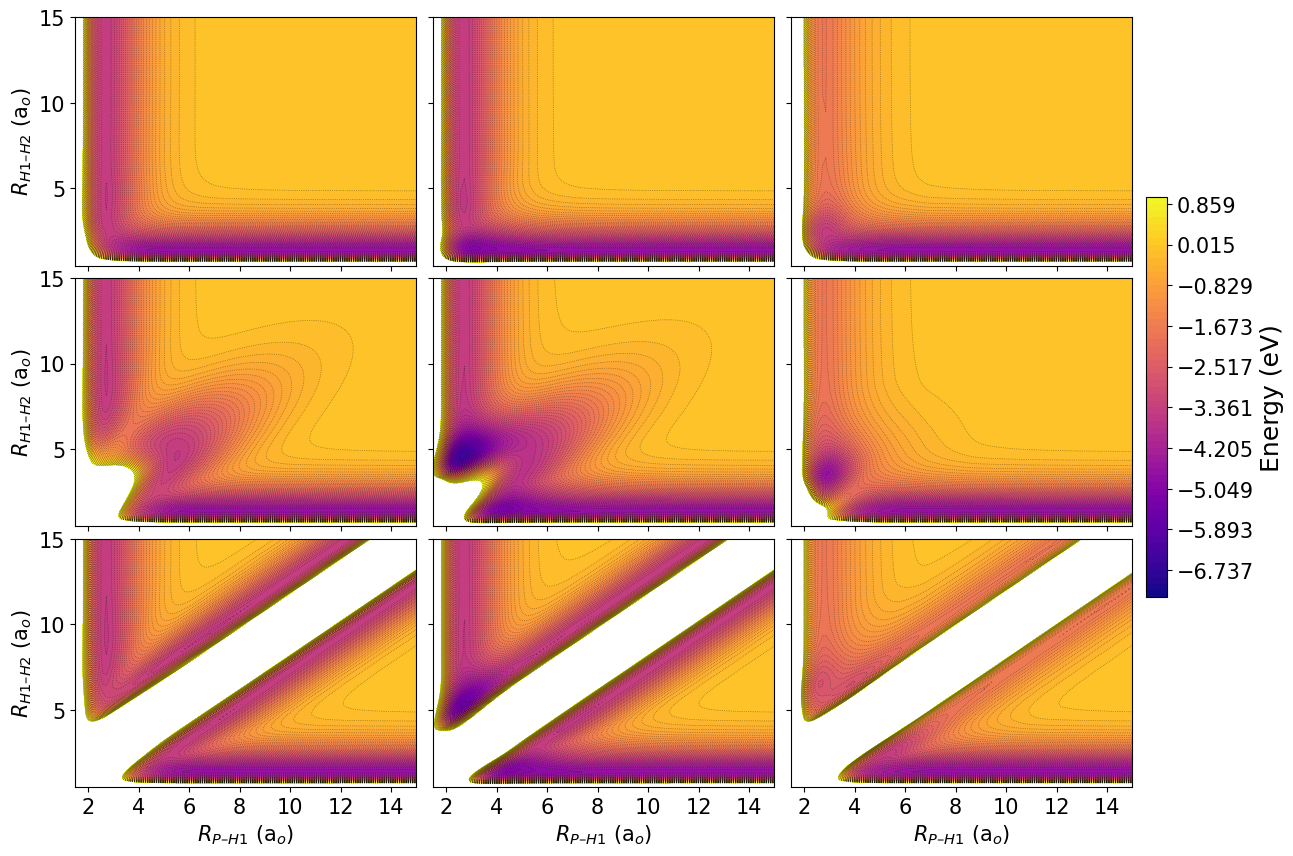

In [9]:
r12_vals = np.linspace(1.5, 15, 100)
r23_vals = np.linspace(0.5, 15, 100)
R12, R23 = np.meshgrid(r12_vals, r23_vals)

# Parámetros
n_states = 3
theta_medio_deg = [150, 150, 130]  # Ángulo intermedio específico para cada estado
theta_list_deg = [
    [0,         theta_medio_deg[0], 180],
    [0,         theta_medio_deg[1], 180],
    [0,         theta_medio_deg[2], 180],
]
theta_list_rad = np.radians(theta_list_deg).T  # 3 filas (ángulos), n_states columnas

# Configuración de gráficos con espacio a la derecha para la colorbar
fig, axes = plt.subplots(n_states, 3, figsize=(14, 10), sharex='col', sharey='row',
                         gridspec_kw={'right': 0.88})
fig.subplots_adjust(hspace=0.05, wspace=0.05)

vmin, vmax = -7.3, 1.
levels = np.linspace(vmin, vmax, 60)
levels_cnt = np.linspace(vmin, vmax, 60)
cmap = plt.get_cmap('plasma').copy()
# cmap.set_over(cmap(0.9))
norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

cp_reference = None 

# Loop principal
for i_theta in range(3):          
    for j_state in range(n_states):
        ax = axes[i_theta, j_state]
        theta_rad = theta_list_rad[i_theta, j_state]

        E = np.zeros_like(R12)
        for i in range(R12.shape[0]):
            for j in range(R12.shape[1]):
                r12 = R12[i, j]
                r23 = R23[i, j]
                argumento = r12**2 + r23**2 + 2 * r12 * r23 * np.cos(theta_rad)
                if argumento <= 0:
                    E[i, j] = np.nan
                else:
                    r13 = np.sqrt(argumento)
                    if j_state == 0:
                        E[i, j] = energia1TAp(r12, r13, r23)*27.2114
                    elif j_state == 1:
                        E[i, j] = energia1TApp(r12, r13, r23)*27.2114
                    elif j_state == 2:
                        E[i, j] = energia2TApp(r12, r13, r23)*27.2114

        # Graficar
        # cp = ax.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
        cp = ax.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm)
        ax.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, linestyles=':', alpha=0.5)

        # Guardar mappable para la colorbar si es el subplot (1,2)
        if i_theta == 1 and j_state == 2:
            cp_reference = cp

        # Ejes limpios
        if i_theta == 2:
            ax.set_xlabel(r"$R_{P–H1}$ (a$_o$)", fontsize=15)
            ax.tick_params(axis='x', labelsize=15)
        if j_state == 0:
            ax.set_ylabel(r"$R_{H1–H2}$ (a$_o$)", fontsize=15)
            ax.tick_params(axis='y', labelsize=15)

# Colorbar externa a la derecha
if cp_reference is not None:
    cbar_ax = fig.add_axes([0.89, 0.3, 0.015, 0.4])  # [left, bottom, width, height]
    cbar = fig.colorbar(cp_reference, cax=cbar_ax)
    cbar.set_label('Energy (eV)', fontsize=18)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.savefig("1TApp_2TApp_1TAp.png", dpi=300, transparent=True)
plt.show()


/tmp/ipykernel_3843820/400504388.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


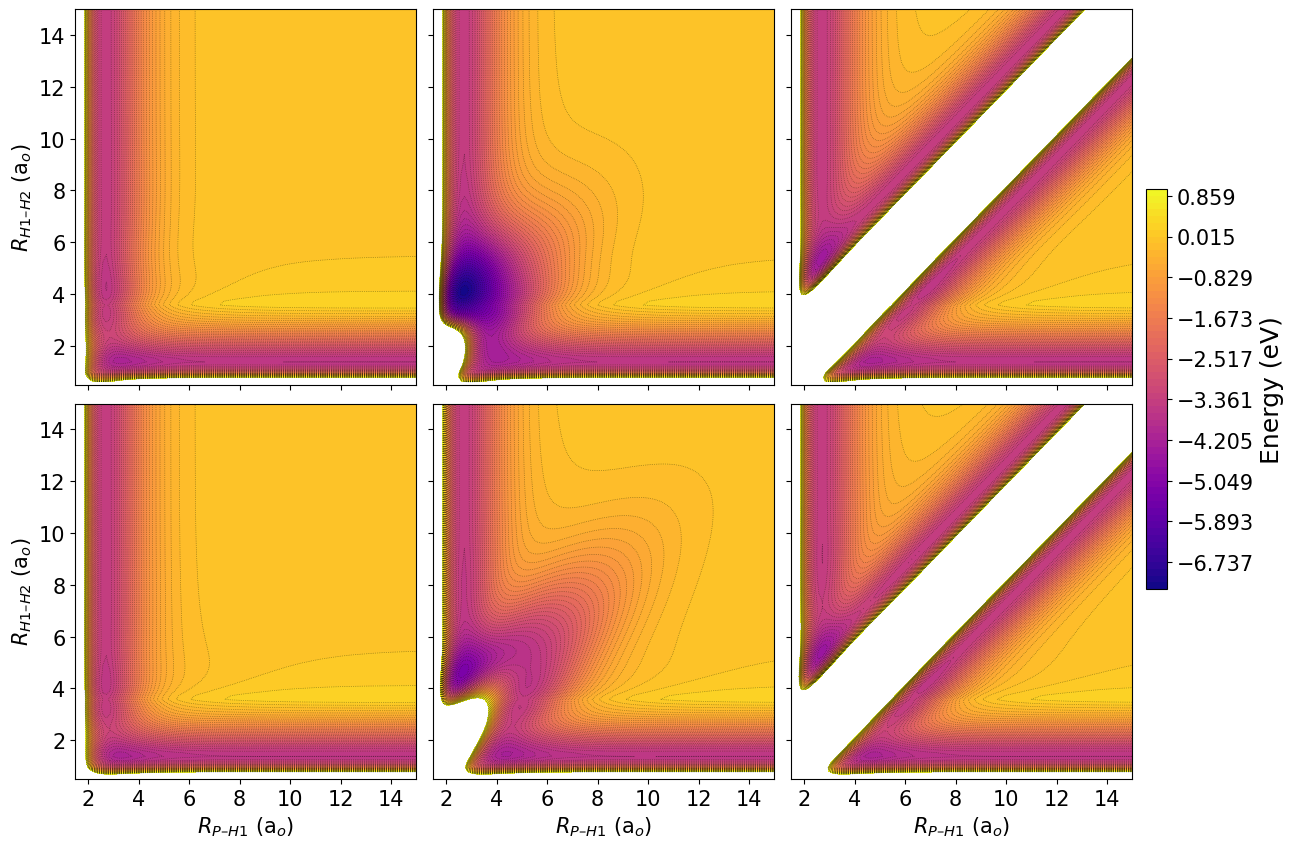

In [8]:
r12_vals = np.linspace(1.5, 15, 100)
r23_vals = np.linspace(0.5, 15, 100)
R12, R23 = np.meshgrid(r12_vals, r23_vals)

# Parámetros
n_states = 2
theta_medio_deg = [140, 150]  # Ángulo intermedio específico para cada estado
theta_list_deg = [
    [0,         theta_medio_deg[0], 180],
    [0,         theta_medio_deg[1], 180],
    # [0,         theta_medio_deg[2], 180],
]
theta_list_rad = np.radians(theta_list_deg)  # 3 filas (ángulos), n_states columnas

# Configuración de gráficos con espacio a la derecha para la colorbar
fig, axes = plt.subplots(n_states, 3, figsize=(14, 10), sharex='col', sharey='row',
                         gridspec_kw={'right': 0.88})
fig.subplots_adjust(hspace=0.05, wspace=0.05)

vmin, vmax = -7.3, 1.
levels = np.linspace(vmin, vmax, 60)
levels_cnt = np.linspace(vmin, vmax, 60)
cmap = plt.get_cmap('plasma').copy()
# cmap.set_over(cmap(0.9))
norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

cp_reference = None  # Guardaremos aquí la referencia al contour plot deseado

# Loop principal
for i_theta in range(3):          
    for j_state in range(n_states):
        ax = axes[j_state,i_theta]
        theta_rad = theta_list_rad[j_state,i_theta]

        E = np.zeros_like(R12)
        for i in range(R12.shape[0]):
            for j in range(R12.shape[1]):
                r12 = R12[i, j]
                r23 = R23[i, j]
                argumento = r12**2 + r23**2 + 2 * r12 * r23 * np.cos(theta_rad)
                if argumento <= 0:
                    E[i, j] = np.nan
                else:
                    r13 = np.sqrt(argumento)
                    if j_state == 0:
                        E[i, j] = energia1SAp(r12, r13, r23)*27.2114
                    elif j_state == 1:
                        E[i, j] = energia1SApp(r12, r13, r23)*27.2114

        # Graficar
        # cp = ax.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
        cp = ax.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm)
        ax.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, linestyles=':', alpha=0.5)

        # Guardar mappable para la colorbar si es el subplot (1,2)
        if i_theta == 1 and j_state == 0:
            cp_reference = cp

        # Ejes limpios
        if j_state == 1:
            ax.set_xlabel(r"$R_{P–H1}$ (a$_o$)", fontsize=15)
            ax.tick_params(axis='x', labelsize=15)
        if i_theta == 0:
            ax.set_ylabel(r"$R_{H1–H2}$ (a$_o$)", fontsize=15)
            ax.tick_params(axis='y', labelsize=15)

# Colorbar externa a la derecha
if cp_reference is not None:
    cbar_ax = fig.add_axes([0.89, 0.3, 0.015, 0.4])  # [left, bottom, width, height]
    cbar = fig.colorbar(cp_reference, cax=cbar_ax)
    cbar.set_label('Energy (eV)', fontsize=18)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.savefig("1SAp_1SApp.png", dpi=300, transparent=True)
plt.show()


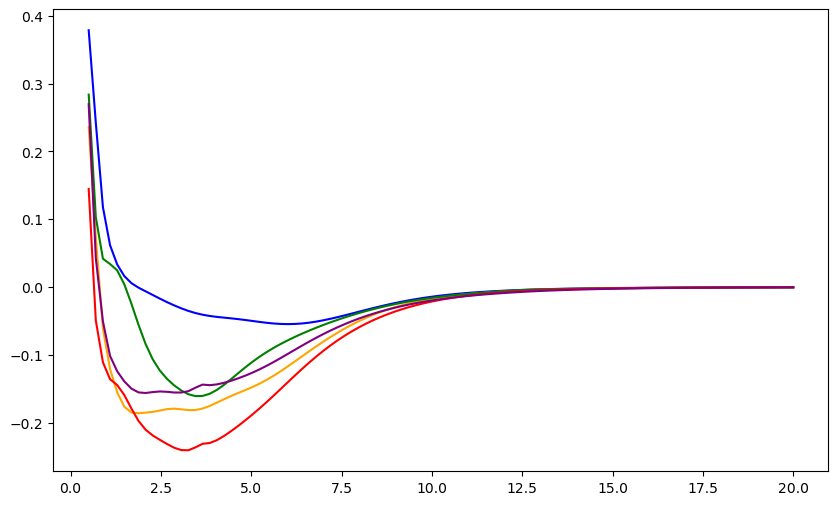

In [13]:
R= np.linspace(0.5, 20.0, 100)
E1TAp = np.zeros_like(R)
E1TApp = np.zeros_like(R)
E2TApp = np.zeros_like(R)
E1SAp = np.zeros_like(R)
E1SApp = np.zeros_like(R)
ang=90
rhh=2.5
for i, r in enumerate(R):
    r12, r13, r23 = get_ic(rhh, r, ang)
    E1TAp[i] = energia1TAp(r12, r13, r23)
    E1TApp[i] = energia1TApp(r12, r13, r23)
    E2TApp[i] = energia2TApp(r12, r13, r23)
    E1SAp[i] = energia1SAp(r12, r13, r23)
    E1SApp[i] = energia1SApp(r12, r13, r23)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(R, E1TAp, label='1TAp', color='blue')
ax.plot(R, E1TApp, label='1TApp', color='orange')
ax.plot(R, E2TApp, label='2TApp', color='green')
ax.plot(R, E1SAp, label='1SAp', color='red')
ax.plot(R, E1SApp, label='1SApp', color='purple')